# Case Study: How Does a Bike-Share Navigate Speedy Success?
### Introduction
We will work for a fictional company, Cyclistic, and meet different characters and team members. In order to
answer the key business questions, we will follow the steps of the data analysis process:
1. <a href="#ask">Ask</a>
2. <a href="#prepare">Prepare</a>
3. <a href="#process">Process</a>
4. <a href="">Analyze</a>
5. <a href="">Share</a>
6. <a href="">Act</a>

### Scenario
As a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, our team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, our team will design a new marketing strategy to convert casual riders into annual members.

# Ask<div id="ask"></div>
Our business task is to analyze **how do annual members and casual riders use Cyclistic bikes differently**, which helps in designing a new marketing strategy to convert casual riders into annual members.

**Problem type**: Identifying themes

# Prepare<div id="prepare"></div>
We will use Cyclistic’s historical trip data to analyze and identify trends. [Download the previous 12 months of Cyclistic trip data here](https://www.kaggle.com/datasets/oksharma/cyclistic-bikeshare-dataset). This is public data that we can use to explore how different customer types are using Cyclistic bikes. We have 12 datasets organized in chronological order from _June-2021_ to _May-2022_.

# Process
Basic cleaning or manipulation of data like:
- Duplicate data
- Outdated data
- Incomplete data
- Incorrect/inaccurate data
- Inconsistence data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# import data
june21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202106-divvy-tripdata.csv')
july21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202107-divvy-tripdata.csv')
august21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202108-divvy-tripdata.csv')
september21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202109-divvy-tripdata.csv')
october21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202110-divvy-tripdata.csv')
november21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202111-divvy-tripdata.csv')
december21 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202112-divvy-tripdata.csv')
jan22 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202201-divvy-tripdata.csv')
february22 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202202-divvy-tripdata.csv')
march22 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202203-divvy-tripdata.csv')
april22 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202204-divvy-tripdata.csv')
may22 = pd.read_csv('../input/cyclistic-bikeshare-dataset/202205-divvy-tripdata.csv')
year = [june21, july21, august21, september21, october21, november21, december21, jan22, february22, march22, april22, may22]

**Which features are numerical?**
- start_lat
- start_lng
- end_lat
- end_lng

In [3]:
june21.describe()

,start_lat,start_lng,end_lat,end_lng
count,729595.000000,729595.000000,728878.000000,728878.000000
mean,41.903507,-87.644553,41.903886,-87.644824
std,0.042470,0.025981,0.042661,0.026240
min,41.640000,-87.780000,41.510000,-87.860000
25%,41.883380,-87.658617,41.883668,-87.658807
50%,41.900000,-87.640000,41.900960,-87.640823
75%,41.928887,-87.627479,41.929424,-87.627542
max,42.070000,-87.520000,42.080000,-87.490000


**Which features are categorical?**
- rideable_type
- member casual

**Which features are mixed data types?**
- ride_id
- start_station_name
- start_station_id
- end_station_name
- end_station_id

**Which features are datetime?**
- started_at
- ended_at

In [4]:
june21.describe(include=['O'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,729595,729595,729595,729595,649502,649502,643208,643208,729595
unique,729595,3,589805,589069,689,689,690,690,2
top,99FEC93BA843FB20,classic_bike,2021-06-17 18:14:52,2021-06-05 07:02:34,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,casual
freq,1,435020,7,10,14072,14072,14036,14036,370681


We have two kinds of data:
- **Personal**: ride_id, membership, bike_type
- **Route**: station, geolocation, duration

Now we know about the attributes of the dataset, we can proceed to data our data processing steps. Begins with concatenate the whole months dataset into one so that we can clean it.

In [5]:
recent_year = pd.concat(year, ignore_index=True)
# before proceeding to any further steps remove duplicates if any
recent_year = recent_year.drop_duplicates(inplace=False)
recent_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 5860775
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 626.0+ MB


### Missing data
Find out what percentage of data is missing and how to deal with each of them.

In [6]:
missing_data_count = recent_year.isnull().sum()
missing_data_percent = recent_year.isnull().sum() / len(recent_year) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 6 features having missing data.

Top 10 missing value features:


,Count,Percent
end_station_name,878338,14.986718
end_station_id,878338,14.986718
start_station_name,823167,14.045358
start_station_id,823164,14.045307
end_lat,5036,0.085927
end_lng,5036,0.085927


We have around **15% of station data missing** and **8.6% of geoloc data missing**. Now we will separate these three route datasets for individual analysis and a recent_year

In [7]:
station = recent_year[["ride_id", "rideable_type", "member_casual", "start_station_name", "start_station_id", "end_station_name", "end_station_id"]].dropna()
geoloc = recent_year[["ride_id", "rideable_type", "member_casual", "start_lat", "start_lng", "end_lat", "end_lng"]].dropna()
duration = recent_year[["ride_id", "rideable_type", "member_casual", "started_at", "ended_at"]].dropna()
recent_year_clean = recent_year.dropna()

### Typos
In station names we can easily spot typos by the different unique values in their ids and names. Where in __start_station_name has 32 typos__ and in __end_station_name has 33 typos__.

In [8]:
print("start_station_name:", station["start_station_name"].nunique(),
      "\nstart_station_id:", station["start_station_id"].nunique())

start_station_name: 1045 
start_station_id: 1013


In [9]:
print("end_station_name:", station["end_station_name"].nunique(),
      "\nend_station_id:", station["end_station_id"].nunique())

end_station_name: 1054 
end_station_id: 1021


Now we have two options either delete the station name or find out the 32 least counted names and it's corresponding ids then correct them by ids.

For now we will delete the station name because the second option is I think is not the right solution.

In [10]:
# delete station name columns
station = station.drop('start_station_name', axis=1)
station = station.drop('end_station_name', axis=1)
station.head()

,ride_id,rideable_type,member_casual,start_station_id,end_station_id
50,0D904FEC5F84A538,classic_bike,member,TA1306000006,TA1306000006
51,C4185F300D6B552B,classic_bike,member,TA1306000003,KA1503000043
53,60F97090AC85F55E,classic_bike,member,TA1307000127,TA1309000014
56,FBC7B1F0160AA304,classic_bike,member,KA1503000043,TA1306000003
57,37A52001AEEFA4E5,classic_bike,member,TA1306000003,KA1503000043


### Consistent formatting
Here we can easily spot that started_at and ended_at is in object datatype but it should be in datetime format. So convert these two attributes in consistent format.

In [11]:
duration["started_at"] = pd.to_datetime(duration["started_at"], format='%Y-%m-%d %H:%M:%S')
duration["ended_at"] = pd.to_datetime(duration["ended_at"], format='%Y-%m-%d %H:%M:%S')
duration["started_at"].head(2)

0   2021-06-13 14:31:28
1   2021-06-04 11:18:02
Name: started_at, dtype: datetime64[ns]

### Data Manipulation
1. Add three columns *in_sec*, _weekday_, _day_ and _month_ in _duration_ dataset. 
2. Add a column *in_km* in _geoloc_ dataset.
3. Add a *home_station* and _path_ in _station_ dataset.

The **in_sec** column is the difference of the started_at and ended_at datetime in seconds.

In [12]:
# start with duration dataset
duration["weekday"] = duration["started_at"].dt.day_name()
duration["day"] = duration["started_at"].dt.day
duration["month"] = duration["started_at"].dt.month
duration["in_sec"] = (duration["ended_at"]-duration["started_at"]).dt.total_seconds()
duration.head()

,ride_id,rideable_type,member_casual,started_at,ended_at,weekday,day,month,in_sec
0,99FEC93BA843FB20,electric_bike,member,2021-06-13 14:31:28,2021-06-13 14:34:11,Sunday,13,6,163.0
1,06048DCFC8520CAF,electric_bike,member,2021-06-04 11:18:02,2021-06-04 11:24:19,Friday,4,6,377.0
2,9598066F68045DF2,electric_bike,member,2021-06-04 09:49:35,2021-06-04 09:55:34,Friday,4,6,359.0
3,B03C0FE48C412214,electric_bike,member,2021-06-03 19:56:05,2021-06-03 20:21:55,Thursday,3,6,1550.0
4,B9EEA89F8FEE73B7,electric_bike,member,2021-06-04 14:05:51,2021-06-04 14:09:59,Friday,4,6,248.0


In [13]:
# now work with geoloc
# convert lat and lng into km
lat1, lon1 = geoloc["start_lat"], geoloc["start_lng"]
lat2, lon2 = geoloc["end_lat"], geoloc["end_lng"]
radius = 6371  # km

dlat = np.radians(lat2 - lat1)
dlon = np.radians(lon2 - lon1)
a = (np.sin(dlat / 2) * np.sin(dlat / 2) +
     np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) *
     np.sin(dlon / 2) * np.sin(dlon / 2))
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = radius * c

geoloc["in_km"] = distance
geoloc.head()

,ride_id,rideable_type,member_casual,start_lat,start_lng,end_lat,end_lng,in_km
0,99FEC93BA843FB20,electric_bike,member,41.80,-87.59,41.80,-87.60,0.828931
1,06048DCFC8520CAF,electric_bike,member,41.79,-87.59,41.80,-87.60,1.386963
2,9598066F68045DF2,electric_bike,member,41.80,-87.60,41.79,-87.59,1.386963
3,B03C0FE48C412214,electric_bike,member,41.78,-87.58,41.80,-87.60,2.774003
4,B9EEA89F8FEE73B7,electric_bike,member,41.80,-87.59,41.79,-87.59,1.111949


In [14]:
station['home_station'] = [1 if x==y else 0 for x,y in zip(station['start_station_id'], station['end_station_id'])]
station['path'] = station[['start_station_id', 'end_station_id']].apply(lambda x: '-'.join(x), axis=1)
station.head()

,ride_id,rideable_type,member_casual,start_station_id,end_station_id,home_station,path
50,0D904FEC5F84A538,classic_bike,member,TA1306000006,TA1306000006,1,TA1306000006-TA1306000006
51,C4185F300D6B552B,classic_bike,member,TA1306000003,KA1503000043,0,TA1306000003-KA1503000043
53,60F97090AC85F55E,classic_bike,member,TA1307000127,TA1309000014,0,TA1307000127-TA1309000014
56,FBC7B1F0160AA304,classic_bike,member,KA1503000043,TA1306000003,0,KA1503000043-TA1306000003
57,37A52001AEEFA4E5,classic_bike,member,TA1306000003,KA1503000043,0,TA1306000003-KA1503000043


### Outlier
During analysis in _geoloc dataset_ I found that their a value which acts as an outlier where the new column **in_km** drived from __Lattitude and Longitude columns__ have a value of __1189.39__. So, we're removing this outlier which can affect our analysis. 

In [15]:
# only keep the observation in geoloc dataset whose: 
# 'in_km' < 150
geoloc = geoloc[geoloc['in_km'] < 150]

Same as Geoloc dataset we also found there are 139 observations in Duration dataset where in_sec is less than 0 which is not possible, So we will remove those observations

In [16]:
# only keep the observation in duration dataset whose: 
# 'in_sec' > 0
duration = duration[duration['in_sec'] >= 0]

# Analyze
Now we have 4 basic question to answer to know how annual members and casual riders use bikes differently:
1. Top paths and stations
2. Bike priority 
3. Distance and durations
4. Most traffic on weekdays/days/months

Before we proceed to these steps we have to first know the __Total Numbers of Annual Members and Casual Riders__.

<AxesSubplot:>

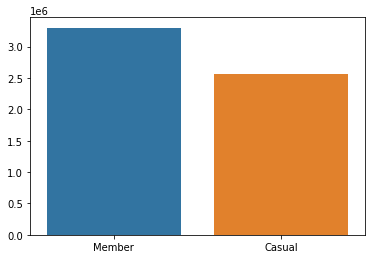

In [17]:
## In recent_year dataset
# data group by 'ride_id'
# find the len
# where 'member_casual' = 'member'
total_member = len(recent_year[recent_year["member_casual"]=='member'].groupby('ride_id'))

# where 'member_casual' = 'casual'
total_casual = len(recent_year[recent_year["member_casual"]=='casual'].groupby('ride_id'))

# Prepare data
usertype = ['Member', 'Casual']
total = [total_member, total_casual]

sns.barplot(x=usertype,
            y=total)

### 1. Top paths and stations
For this analysis we will use two datasets which are __stations__ for stations and __geoloc__ for paths.

In [18]:
# top 15 most traffic stations
top_stations = station.groupby('start_station_id').count().sort_values(by='ride_id', ascending=False).head(15)
top_stations_count = top_stations.ride_id.values
top_stations_id = top_stations.index.values
# then count the member and casual from those stations
casual, member = [], []
for x in top_stations_id:
    trial = station[station['start_station_id']==x].pivot_table(index='member_casual',
                                                                      aggfunc='count',
                                                                      values='ride_id')
    casual.append(trial['ride_id'][0])
    member.append(trial['ride_id'][1])

top_station_traffic = pd.DataFrame()
top_station_traffic['station_id'] = top_stations_id
top_station_traffic['casual'] = casual
top_station_traffic['member'] = member
top_station_traffic['station_count'] = top_stations_count

In [19]:
start_station_distribution = station.pivot_table(index='start_station_id', 
                                                 columns='member_casual', 
                                                 aggfunc='count',
                                                 values='ride_id')
end_station_distribution = station.pivot_table(index='end_station_id', 
                                               columns='member_casual', 
                                               aggfunc='count',
                                               values='ride_id')

**Top 10 stations where casual riders starts their trip**

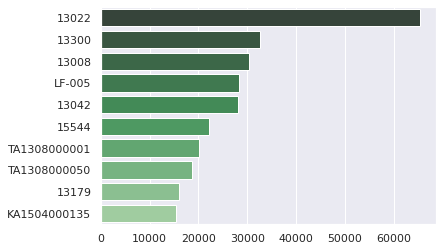

In [20]:
top_casual_start_station = start_station_distribution['casual'].sort_values(ascending=False).head(10)

# Set Seaborn style
sns.set(style='darkgrid', color_codes=True)
pal = sns.color_palette("Greens_d", len(top_casual_start_station))
rank = top_casual_start_station.argsort().argsort()

# Construct plot
sns.barplot(y = top_casual_start_station.index.values, 
            x = top_casual_start_station.values,
            palette=np.array(pal)[rank])
plt.show()

**Top 10 stations where annual members starts their trip**

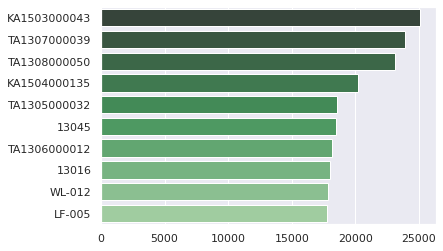

In [21]:
top_member_start_station = start_station_distribution['member'].sort_values(ascending=False).head(10)

# Set Seaborn style
sns.set(style='darkgrid', color_codes=True)
pal = sns.color_palette("Greens_d", len(top_member_start_station))
rank = top_member_start_station.argsort().argsort()

# Construct plot
sns.barplot(y = top_member_start_station.index.values, 
            x = top_member_start_station.values,
            palette=np.array(pal)[rank])
plt.show()

**Top 10 stations where casual riders ends their trip**

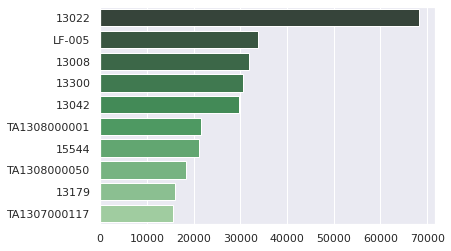

In [22]:
top_casual_end_station = end_station_distribution['casual'].sort_values(ascending=False).head(10)

# Set Seaborn style
sns.set(style='darkgrid', color_codes=True)
pal = sns.color_palette("Greens_d", len(top_casual_end_station))
rank = top_casual_end_station.argsort().argsort()

# Construct plot
sns.barplot(y = top_casual_end_station.index.values, 
            x = top_casual_end_station.values,
            palette=np.array(pal)[rank])
plt.show()

**Top 10 stations where annual members ends their trip**

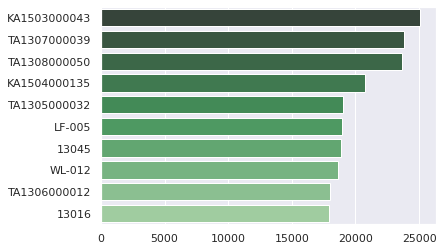

In [23]:
top_member_end_station = end_station_distribution['member'].sort_values(ascending=False).head(10)

# Set Seaborn style
sns.set(style='darkgrid', color_codes=True)
pal = sns.color_palette("Greens_d", len(top_member_end_station))
rank = top_member_end_station.argsort().argsort()

# Construct plot
sns.barplot(y = top_member_end_station.index.values, 
            x = top_member_end_station.values,
            palette=np.array(pal)[rank])
plt.show()

Now we want to know the home stations of the members and casual riders both.

So, first extract the distribution of home stations between members and casual riders.

In [24]:
home_station_distribution = station[station['home_station']==1].pivot_table(index='start_station_id', 
                                                                            columns='member_casual', 
                                                                            aggfunc='count',
                                                                            values='ride_id')

**Top 50 home stations of annual members**

In [25]:
top_member_home_station = home_station_distribution['member'].sort_values(ascending=False)[:50]

member_home_station_indices = [station[station['start_station_id']==ix].index.values[0] for ix in top_member_home_station.index.values]
top_member_home_station_loc = recent_year_clean.loc[member_home_station_indices][['start_station_id', 'start_lat','start_lng']]
top_member_home_station_loc['count'] = top_member_home_station.values

# Geographical scatter plot
# import library
import plotly.express as px

def location_map(df, title):
#     px.set_mapbox_access_token(open(".mapbox_token").read())
    fig = px.scatter_mapbox(df, lat="start_lat", lon="start_lng",
                            size='count',
                            size_max =15,
                            zoom=10,
#                             height=500,
                            title=title,
                            hover_data={'start_lat':True,
                                        'start_lng':True,
                                        'count':True,
                                       }
                           )
    fig.update_layout(mapbox_style='open-street-map')
    fig.show()

location_map(top_member_home_station_loc, 'Most traffice Home Stations of Annual Members')

**Top 50 home stations of casual riders** 

In [26]:
top_casual_home_station = home_station_distribution['casual'].sort_values(ascending=False)[:50]

casual_home_station_indices = [station[station['start_station_id']==ix].index.values[0] for ix in top_casual_home_station.index.values]
top_casual_home_station_loc = recent_year_clean.loc[casual_home_station_indices][['start_station_id', 'start_lat','start_lng']]
top_casual_home_station_loc['count'] = top_casual_home_station.values

location_map(top_casual_home_station_loc, 'Most traffice Home Stations of Casual Riders')

Now what are the know the common paths of annual members and casual riders.

In [27]:
path_distribution = station[station['home_station'] == 0].pivot_table(index='path', 
                                                                      columns='member_casual', 
                                                                      aggfunc='count',
                                                                      values='ride_id')

**Top 10 paths of the casual riders**

In [28]:
top_casual_path = path_distribution['casual'].sort_values(ascending=False).head(10)
# match the column and find the indices
casual_indices = [station[station['path']==ix].index.values[0] for ix in top_casual_path.index.values]

top_casual_path_loc = recent_year_clean.loc[casual_indices][['start_station_id', 'end_station_id', 'start_lat','start_lng','end_lat','end_lng']]
top_casual_path_loc['count'] = top_casual_path.values
top_casual_path_loc

# with plt.style.context(("seaborn", "ggplot")):
#     ## Plot world
#     world[world.name == "Chicago"].plot(figsize=(15,15), edgecolor="grey", color="white");

#     ## Loop through each flight plotting line depicting flight between source and destination
#     ## We are also plotting scatter points depicting source and destinations
#     for slat,dlat, slon, dlon, count in zip(top_casual_path_loc["start_lat"], top_casual_path_loc["end_lat"], top_casual_path_loc["start_lng"], top_casual_path_loc["end_lng"], top_casual_path_loc["count"]):
#         plt.plot([slon , dlon], [slat, dlat], linewidth=count/100, color="lime", alpha=0.5)
#         plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.1, s=count)

#     plt.title("Connection Map Depicting Flights between Cities of Brazil")

#     plt.savefig("connection-map-geopandas-4.png", dpi=100)

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,count
21007,13300,13022,41.880958,-87.616743,41.892278,-87.612043,5648.0
31299,13022,13008,41.892278,-87.612043,41.881032,-87.624084,3451.0
21289,13008,13022,41.881032,-87.624084,41.892278,-87.612043,3049.0
67516,13022,13300,41.892278,-87.612043,41.880958,-87.616743,3011.0
21572,15544,13022,41.867226,-87.615355,41.892278,-87.612043,2922.0
18471,13022,13042,41.892278,-87.612043,41.900960,-87.623777,2649.0
76877,13022,LF-005,41.892278,-87.612043,41.911722,-87.626804,2580.0
21156,KA1503000064,13022,41.886976,-87.612813,41.892278,-87.612043,2281.0
21065,13042,13022,41.900960,-87.623777,41.892278,-87.612043,2113.0
20983,LF-005,13022,41.911722,-87.626804,41.892278,-87.612043,2030.0


In [29]:
top_member_path = path_distribution['member'].sort_values(ascending=False).head(10)
# match the column and find the indices
member_indices = [station[station['path']==ix].index.values[0] for ix in top_member_path.index.values]

top_member_path_loc = recent_year_clean.loc[member_indices][['start_station_id', 'end_station_id', 'start_lat','start_lng','end_lat','end_lng']]
top_member_path_loc['count'] = top_member_path.values
top_member_path_loc

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,count
49507,KA1503000014,KA1503000071,41.785097,-87.601073,41.791478,-87.599861,5482.0
65373,KA1503000014,KA1504000076,41.785097,-87.601073,41.794301,-87.601450,5251.0
121127,KA1503000071,KA1503000014,41.791478,-87.599861,41.785097,-87.601073,5243.0
11250,KA1504000076,KA1503000014,41.794301,-87.601450,41.785097,-87.601073,4629.0
12427,13217,13216,41.834900,-87.617930,41.834734,-87.625813,2328.0
11853,13216,13217,41.834707,-87.625910,41.834772,-87.617953,2220.0
20486,13332,TA1307000130,41.872187,-87.661501,41.871737,-87.651030,2202.0
39004,TA1307000130,13332,41.871737,-87.651030,41.872187,-87.661501,2054.0
14046,KA1503000014,TA1309000011,41.785097,-87.601073,41.788746,-87.601334,1738.0
12008,13332,TA1307000121,41.872187,-87.661501,41.871840,-87.646640,1634.0


### Bike Priority
There are three types of bikes being used:
- Classic bike
- Docked bike
- Electric bike

#### What proportion of bikes are used
As we know **Classic bike** are mostly used by the customers. Let's check the all other proportions of bikes used by __Annual Members__ and __Casual Riders__. 

We can spot here that __usability of Electric bikes is same__ in both the cases (ie., 25%) But the __Annual members mostly prefers Classic bikes__ whereas __Casual riders also prefers Docked bikes with mostly prefered choice is same Classic bikes__.

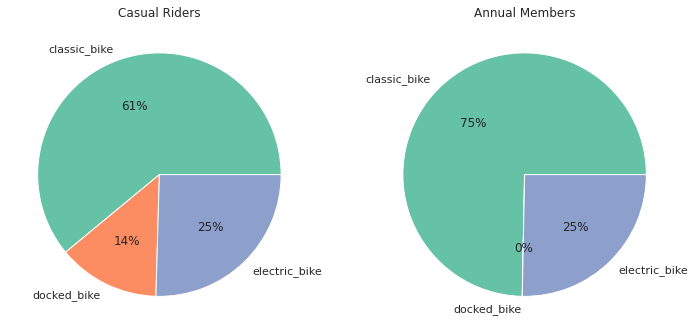

In [30]:
# a pivot table which is 
# grouped by rideable_type x member_casual
# aggregate by count of ride_id in different groups
bike_priority = recent_year_clean.pivot_table(index='rideable_type',
                                                columns='member_casual',
                                                aggfunc='count',
                                                values='ride_id',
                                                fill_value=0)

# declaring data
data1 = bike_priority.casual.values
data2 = bike_priority.member.values
keys = bike_priority.index.values
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on pie chart
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])

ax1.pie(data1, labels=keys, colors=palette_color, autopct='%.0f%%')
ax1.title.set_text("Casual Riders")
ax2.pie(data2, labels=keys, colors=palette_color, autopct='%.0f%%')
ax2.title.set_text("Annual Members")


# displaying chart
plt.show()

### Distance and Duration
We will look at the __What distance usually annual members and casual riders travel__. But before we go for distance analysis, we have to find out __what percentage of annual member and casual rider used Cyclistic bikes only in _Home Stations_.__ Where we can spot only __4% of annual members and 10% of casual riders__ use Cyclistic bikes in their home station where we have been seen earlier that __station id: 13022__ have the most traffic by being a _Home Station_ and mainly by _Casual Riders_. So it can be __Negligible__.

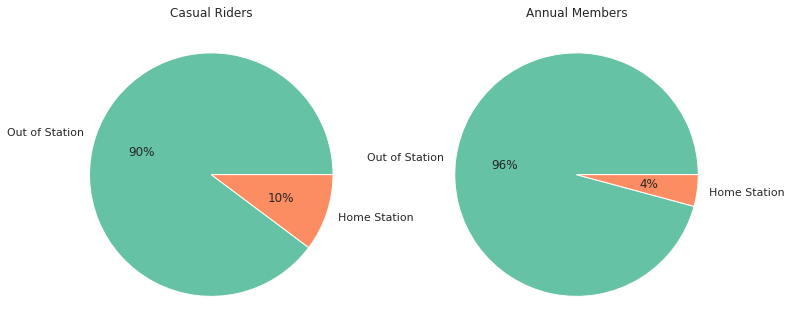

In [31]:
# In geoloc dataset
# a pivot table which is:
# Group by 'member_casual' x 'home_station'
# then count the ride_id
home_station_dist = station.pivot_table(index='home_station',
                    columns='member_casual',
                    aggfunc='count',
                    values='ride_id')

# declaring data
data1 = home_station_dist.casual.values
data2 = home_station_dist.member.values
keys = ['Out of Station', 'Home Station']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on pie chart
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])

ax1.pie(data1, labels=keys, colors=palette_color, autopct='%.0f%%')
ax1.title.set_text("Casual Riders")
ax2.pie(data2, labels=keys, colors=palette_color, autopct='%.0f%%')
ax2.title.set_text("Annual Members")


# displaying chart
plt.show()

#### Distribution of Distance
Now after knowing negligible home station is being used we can easily use whole dataset to know the __Distribution of distance among both types of riders__.

From the distribution we can observe that the __distance travelled is higly skewed data__ where __Annual Members uses bikes to travel around 10 km__ whereas __Casual Riders travel around 20 km__ also with __Casual Riders distance traveled is around 3x than Annual Members__. 

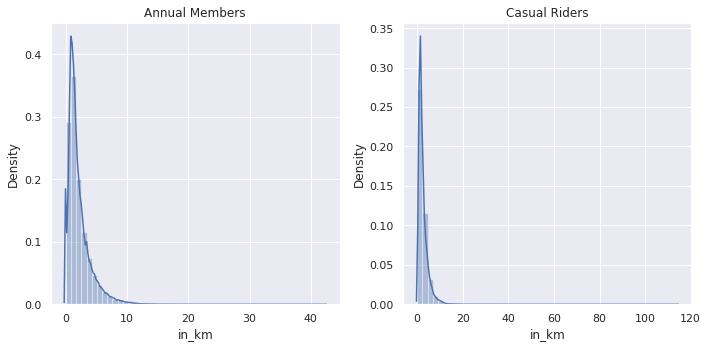

In [32]:
# from geoloc dataset
# extract 'in_km' of members
# list of 'in_km' where 'member_casual'=='member'
member_distance = geoloc[geoloc['member_casual']=='member']['in_km']

# extract distance of casual
# list of distance where 'member_casual'=='casual'
casual_distance = geoloc[geoloc['member_casual']=='casual']['in_km']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(member_distance, ax=axes[0])
axes[0].set_title('Annual Members')

sns.distplot(casual_distance, ax=axes[1])
axes[1].set_title('Casual Riders')
plt.tight_layout()

#### Distribution of Duration
As we seen before that distribution of distance is highly skewed so the __chances of the distribution of duration is also highly skewed which is not helpful__. We for now we find the __average duration and distances__ among different usertypes (members and casual riders).

From the both of the plots we can spot that __the mean of distance is around same ie., 2km__ whereas there is huge difference in which __the mean of duration of Casual Riders is much higher than Annual Members__. So we can conclude that __Both type of users travels same distance but Casual Riders keeps the bike for much more days then Annual Members__.

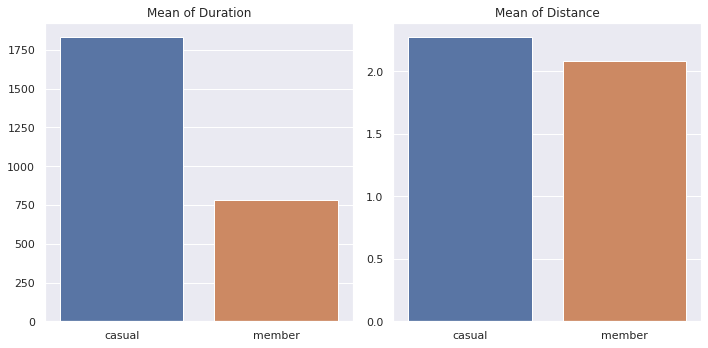

In [33]:
# mean of duration
# in duration dataset
# group data by 'member_user'
# aggregate the 'is_sum' by mean
duration_mean = duration.groupby('member_casual')['in_sec'].mean()

# mean of distance
# in geoloc dataset
# group data by 'member_user'
# aggregate the 'is_sum' by mean
distance_mean = geoloc.groupby('member_casual')['in_km'].mean()

# 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(
    x=duration_mean.index.values,
    y=duration_mean.values, 
    ax=axes[0])
axes[0].set_title('Mean of Duration')

sns.barplot(
    x=distance_mean.index.values,
    y=distance_mean.values, 
    ax=axes[1])
axes[1].set_title('Mean of Distance')
plt.tight_layout()

### Most traffic on weekdays/days/months
Now we are going to find out __on which weekday or day or month Annual Members and Casual Riders start their trip__. 

In [34]:
# in duration dataset
# use pivot table in which
# Group data by 'weekday' x 'member_casual'
# Aggregate the 'ride_id' by count
weekday_traffic = duration.pivot_table(index='weekday',
                                       columns='member_casual',
                                       aggfunc='count',
                                       values='ride_id',
                                       fill_value=0)

# Group data by 'day' x 'member_casual'
# Aggregate the 'ride_id' by count
day_traffic = duration.pivot_table(index='day',
                                   columns='member_casual',
                                   aggfunc='count',
                                   values='ride_id',
                                   fill_value=0)

# Group data by 'month' x 'member_casual'
# Aggregate the 'ride_id' by count
month_traffic = duration.pivot_table(index='month',
                                   columns='member_casual',
                                   aggfunc='count',
                                   values='ride_id',
                                   fill_value=0)

In [35]:
def barplot(x):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Set Seaborn style
    sns.set(style='darkgrid', color_codes=True)
    pal = sns.color_palette("Greens_d", len(x))
    rank1 = x.member.values.argsort().argsort()
    rank2 = x.casual.values.argsort().argsort()
    
    sns.barplot(
        x=x.index.values,
        y=x.member.values, 
        ax=axes[0],
        palette=np.array(pal)[rank1])
    axes[0].set_title('Annual Member')

    sns.barplot(
        x=x.index.values,
        y=x.casual.values, 
        ax=axes[1],
        palette=np.array(pal)[rank2])
    axes[1].set_title('Casual Rider')
    plt.tight_layout()

#### Most traffic on Weekdays
- Annual Members uses Cyclistic bikes mainly on mid of the weeks ie., __Tuesday, Wednesday and Thrusday__ 
- Casual Rider uses Cyclistic bikes on mostly on Weekends ie., __Saturday and Sunday__

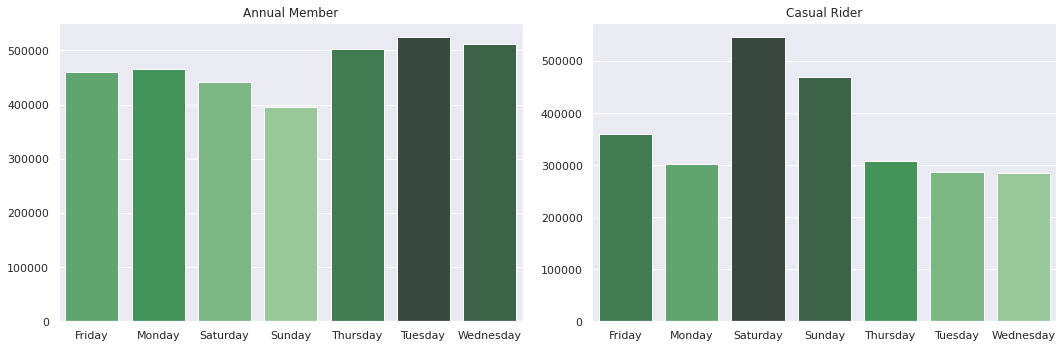

In [36]:
barplot(weekday_traffic)

#### Most traffic on days
Daily traffic is distributed about equally but if we see slight difference is that __Annual Members uses their Cyclistic bikes in Week 2 and Week 3__ whereas __Casual Riders uses their Cyclistic bikes on first three weeks of the month__.

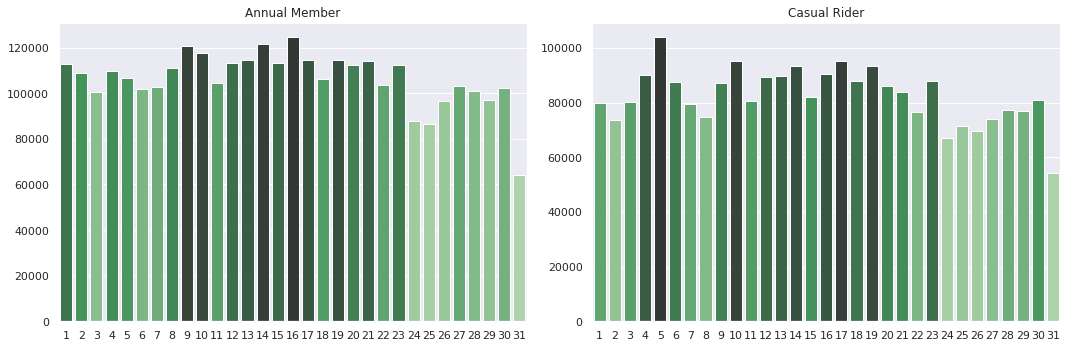

In [37]:
barplot(day_traffic)

#### Most traffic on Months
- Most traffic of Casual riders comes in the middle of the year ie., __about June to September__.
- Most traffic of Annual Member comes in throughout whole year but mostly in between __May to October__.

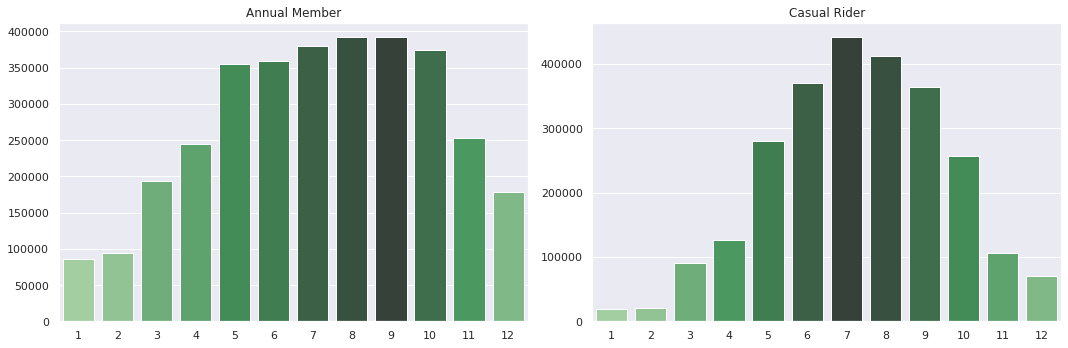

In [38]:
barplot(month_traffic)

# Share
After analyzing the data in this notebook, where we have done __Sorting, Filtering and Aggregating Data__, now we will prepare a __Dashboard__ that could be shareable to anyone.

Before we start building a dashboard in BI tools, we have to first collect the aggregated data by __converting those aggregated dataframes__ which is build and used in _Analyze Phase_ into __CSV file__. 

In [39]:
# list of dataframes to convert in csv
## Usertype Count
# 1. total_usertype 
total_usertype = pd.DataFrame()
total_usertype['usertype'] = usertype
total_usertype['total'] = total
total_usertype.to_csv('total_usertype.csv')

## Top Paths and Stations
# 1. top_start_station
top_station_traffic.to_csv("top_station_traffic.csv")

top_start_station = pd.DataFrame()
top_start_station['member_station'] = top_member_start_station.index.values
top_start_station['member_station_count'] = top_member_start_station.values
top_start_station['casual_station'] = top_casual_start_station.index.values
top_start_station['casual_station_count'] = top_casual_start_station.values
top_start_station.to_csv("top_start_station.csv")
# 2. top_end_station
top_end_station = pd.DataFrame()
top_end_station['member_station'] = top_member_end_station.index.values
top_end_station['member_station_count'] = top_member_end_station.values
top_end_station['casual_station'] = top_casual_end_station.index.values
top_end_station['casual_station_count'] = top_casual_end_station.values
top_end_station.to_csv("top_end_station.csv")
# 3. top_member_home_station_loc
top_member_home_station_loc.to_csv('top_member_home_station_loc.csv')
# 4. top_casual_home_station_loc
top_casual_home_station_loc.to_csv('top_casual_home_station_loc.csv')
# 5. top_casual_path_loc
top_casual_path_loc.to_csv('top_casual_path_loc.csv')
# 6. top_member_path_loc
top_member_path_loc.to_csv('top_member_path_loc.csv')
# 7. home_station_dist
home_station_dist.to_csv('home_station_dist.csv')

## Bike Priority
# 1. bike_priority
bike_priority.to_csv("bike_priority.csv")

## Distance and Duration
# 1. distance_average
distance_mean.to_csv('distance_mean.csv')
# 2. duration_average
duration_mean.to_csv('duration_mean.csv')

## Most traffic on weekdays/days/months
# 1. weekday_traffic
weekday_traffic.to_csv("weekday_traffic.csv")
# 2. day_traffic
day_traffic.to_csv("day_traffic.csv")
# 3. month_traffic
month_traffic.to_csv("month_traffic.csv")